
# <span style='color:midnightblue'> Python para Actuarios Vida   </span>

![ADRISK](Imagenes/KN.png)


## <span style='color:midnightblue'> Sesión 03 : Tablas de mortalidad  </span>

[...] una herramienta estadística actuarial que permite estimar cuántos años vivirá una persona en promedio dado que alcanzó cierta edad. Con esta herramienta, en el caso de las rentas vitalicias del SPP, se exige a las compañías de seguros que guarden los recursos necesarios para asegurar el pago de la pensión de jubilación, de supervivencia o de invalidez, hasta el
último día de la vida de la persona. La actualización de las tablas de mortalidad permiten que la estimación de esos recursos sea lo más exacta posible, y está acorde con las mejores prácticas internacionales ...
[Tablas de Mortalidad SBS](https://www.sbs.gob.pe/Portals/0/tmortalidad/documento_metodologico.pdf)

### 1. Vida Futura Aleatoria

 
- **(x)** denota un individuo de edad **x** en este momento, con **x ≥ 0**.
- La variable aleatoria $T_{x}$ es la vida futura de **(x)**.
- Por tanto, la edad de fallecimiento de **(x)** es **x + T**.


### Tablas de Mortalidad en Python

**Human Mortality Database** (HMD, www.mortality.org).



**life_table** contiene la tabla de mortalidad de Belgica ( 2013 - hombres)

In [1]:
import pandas as pd
import numpy as np

In [2]:
life_table = pd.read_excel("life_table.xlsx",engine='openpyxl') 
life_table

,age,qx,lx,ex,dx
0,0,0.00382,100000,77.95,382
1,1,0.00047,99618,77.25,47
2,2,0.00019,99572,76.28,19
3,3,0.00015,99552,75.30,15
4,4,0.00013,99538,74.31,13
...,...,...,...,...,...
106,106,0.52076,15,1.38,8
107,107,0.53591,7,1.33,4
108,108,0.54984,3,1.29,2
109,109,0.56257,2,1.26,1


In [3]:
life_table_m = pd.read_csv("mltper_1x1.txt",header = 1, delimiter= '\s+') 
life_table_m


,Year,Age,mx,qx,ax,lx,dx,Lx,Tx,ex
0,1841,0,0.18652,0.16496,0.30,100000,16496,88439,4031618,40.32
1,1841,1,0.07413,0.07148,0.50,83504,5969,80520,3943179,47.22
2,1841,2,0.03983,0.03905,0.50,77536,3028,76022,3862659,49.82
3,1841,3,0.02333,0.02306,0.50,74508,1718,73648,3786638,50.82
4,1841,4,0.01707,0.01693,0.50,72789,1232,72173,3712989,51.01
...,...,...,...,...,...,...,...,...,...,...
19753,2018,106,0.67756,0.50610,0.50,30,15,22,42,1.43
19754,2018,107,0.70705,0.52238,0.50,15,8,11,20,1.37
19755,2018,108,0.73490,0.53742,0.50,7,4,5,9,1.33
19756,2018,109,0.76099,0.55125,0.50,3,2,2,4,1.30


In [4]:
#trabajaremos con life_table
#primero conoceremos la data
life_table.head()
life_table.tail()
life_table.sum
life_table.columns

Index(['age', 'qx', 'lx', 'ex', 'dx'], dtype='object')

### Tasas de mortalidad y probabilidades de supervivencia

La probabilidad de morir en un año es :   $q_{x} =  Pr (T_{x}≤ 1) $

- $q_{x}$ es la tasa de mortalidad a la edad **x**.

La probabilidad de sobrevivir un año es :   $p_{x} =  Pr (T_{x}> 1) $

- Por lo tanto, $p_{x}$ es  a  $(1- q_{x})$.


In [5]:
#cuando el nombre de la columna no tiene espacio se le puede con tabla["nombrecolumna"] o tabla.nombrecolumna

In [6]:
life_table.qx

0      0.00382
1      0.00047
2      0.00019
3      0.00015
4      0.00013
        ...   
106    0.52076
107    0.53591
108    0.54984
109    0.56257
110    1.00000
Name: qx, Length: 111, dtype: float64

In [7]:
life_table["qx"]

0      0.00382
1      0.00047
2      0.00019
3      0.00015
4      0.00013
        ...   
106    0.52076
107    0.53591
108    0.54984
109    0.56257
110    1.00000
Name: qx, Length: 111, dtype: float64

In [8]:
# Renombramos  el acceso a las columnas para faciliarnos
qx =life_table.qx
age = life_table.age
ex = life_table.ex
lx = life_table.lx
dx = life_table.dx
px = 1-qx

In [9]:
qx

0      0.00382
1      0.00047
2      0.00019
3      0.00015
4      0.00013
        ...   
106    0.52076
107    0.53591
108    0.54984
109    0.56257
110    1.00000
Name: qx, Length: 111, dtype: float64

### Ejercicio 01
Romelu Lukaku es un futbolista belga que juega como delantero en el Inter de Milán y tiene 27 años

In [10]:
#forma uno filtrar la edad
qx [age == 27]

27    0.00062
Name: qx, dtype: float64

In [11]:
#filtrar el index dado que es igual la edad
qx [27]

0.00062

### Ejercicio 02
Eddy Merckx es un ciclista belga que ganó el Tour de Francia 5 veces y 72

In [12]:
#forma uno filtrar la edad
qx[age == 72]

72    0.02703
Name: qx, dtype: float64

In [13]:
#filtrar el index dado que es igual la edad
qx [72]

0.02703

### Graficamos las tasas de mortalidad belgas  $q_{x}$ en Python

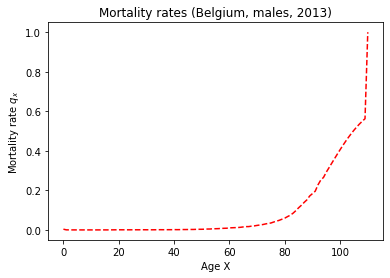

In [14]:
import matplotlib.pyplot as plt  # podemos colocarlo al inicio


## Graficamos el ratio de mortalidad por año

plt.plot(age,qx, color = "red", linestyle = "--")

## Add labels
plt.xlabel("Age X")            
plt.ylabel("Mortality rate $q_{x}$" )    #plt.ylabel("Mortality rate q[x]" )
#   $q_{x}$  para que el x se exprese como subindice

plt.title("Mortality rates (Belgium, males, 2013)")

# show plot
plt.show()

### Graficamos el log de  las tasas de mortalidad belgas  $q_{x}$ en Python

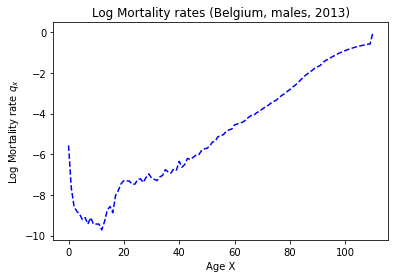

In [15]:
plt.plot(age,np.log(qx), color = "blue", linestyle = "--")

## Add labels
plt.xlabel("Age X")            
plt.ylabel("Log Mortality rate $q_{x}$" )    #plt.ylabel("Mortality rate q[x]" )
#   $q_{x}$  para que el x se exprese como subindice

plt.title("Log Mortality rates (Belgium, males, 2013)")

# show plot
plt.show()

**Nótese:**
1. Mortalidad infantil
2. incremento por accidentes
3. proceso de envejecimiento

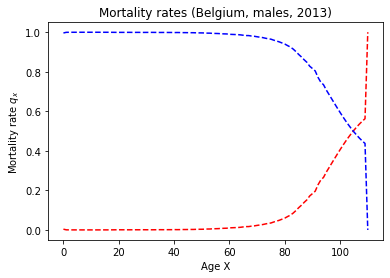

In [16]:
## Graficamos el qx y px

plt.plot(age,qx, color = "red", linestyle = "--")
plt.plot(age,px, color = "blue", linestyle = "--")

## Add labels
plt.xlabel("Age X")            
plt.ylabel("Mortality rate $q_{x}$" )    #plt.ylabel("Mortality rate q[x]" )
#   $q_{x}$  para que el x se exprese como subindice

plt.title("Mortality rates (Belgium, males, 2013)")

# show plot
plt.show()

### La esperanza de vida

La esperanza de vida futura (completa) de $(x)$ es $E [T_{x}] $

Para Romelu Lukaku, quien tiene 27 años, es :

In [17]:
ex[27]

51.74

In [18]:
ex[age == 27]

27    51.74
Name: ex, dtype: float64

Para Eddy Merckx, quien tiene 72 años, es :

In [19]:
ex[72]
ex[age == 72]

72    12.67
Name: ex, dtype: float64

### Graficando a esperanza de vida en Python

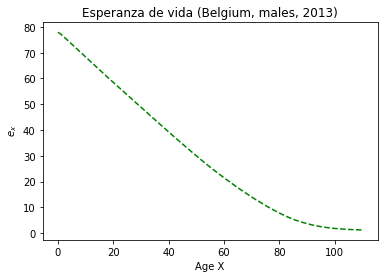

In [20]:
## Graficamos el ratio de mortalidad por año y exp vida con ejes y doble

plt.plot(age,ex, color = "green", linestyle = "--")
## Add labels
plt.xlabel("Age X")            
plt.ylabel(" $e_{x}$" )    

plt.title("Esperanza de vida (Belgium, males, 2013)")

# show plot
plt.show()


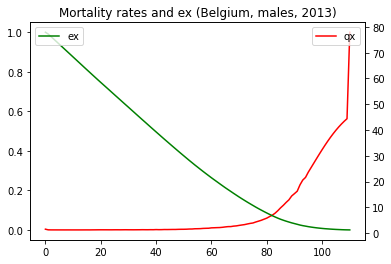

In [21]:
## Graficamos el ratio de mortalidad por año y exp vida con ejes y doble

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

curve1 = ax1.plot( age,qx, label="qx",color = "red")
curve2 = ax2.plot(age,ex, label="ex",color = "green")
curves = [curve1, curve2]

ax1.legend(loc='upper right')
ax2.legend(loc='upper left')
#ax1.legend(loc='upper center', shadow=True, fontsize='x-large')
          
plt.title("Mortality rates and ex (Belgium, males, 2013)")
plt.show()

### Experimentos binomiales

### Un experimento binomial: sobrevivir un año.   
El número de supervivientes hasta la edad $(x + 1)$ sigue un $BIN (ℓ_{x}, p_{x})$.

In [22]:
lx[0]


100000

In [23]:
lx[age==0]


0    100000
Name: lx, dtype: int64

In [24]:
lx [72]

73991

In [25]:
lx[age==72]

72    73991
Name: lx, dtype: int64

In [26]:
px [72]

0.97297

In [27]:
px[72]*lx[72]

71991.02327

In [28]:
from scipy.stats import binom


In [29]:
sim0 = binom.rvs(n = 1 , p = px[72] , size = lx [72])   #rvs : Random variates.

print(sim0)
print(sum(sim0))

[1 1 1 ... 1 1 1]
71940


In [30]:
 # metodo 2
sim1 = np.random.binomial(n = 1 , p = px[72] , size = lx [72])
print(sim1)
print(sum(sim1))

[1 1 1 ... 1 1 1]
71952


### Un experimento binomial: sobrevivir k años 

El número de supervivientes de 1 año sigue un $BIN (ℓ_{x}, p_{x})$.   
Valor esperado:   
        $ℓ_{x +1} = ℓ_{x} ⋅ p_{x}$   

El número de supervivientes de k años sigue un $BIN (ℓ_{k}, _{k}p_{x})$.    
Valor esperado:   
        $ℓ_{x +k} = ℓ_{x} ⋅ _{k}p_{x}$    

Por lo tanto:    
        $_{k}p_{x} = ℓ_{x +k} \div ℓ_{x} $   
        


El número de muertes sigue a un $BIN (ℓ_{x}, q_{x})$.   


Valor esperado:   
    $d_{x} = ℓ_{x} ⋅ q_{x}$    
    $d_{x} = ℓ_{x} ⋅(1- p_{x})$    
     $d_{x} = ℓ_{x} -  ℓ_{x+1}$



In [31]:
dx[72]


2000

In [32]:
dx[age==72]


72    2000
Name: dx, dtype: int64

In [33]:
lx[72] - lx[73]

2000

Calcule  $_{5}p_{65} = ℓ_{70}/ℓ_{65}$

In [34]:
# Probabilidad de que (65) sobreviva 5 años más
lx[70]/lx[65]

0.9145969498910675

In [35]:
p65_5 = (lx[age==70].values/lx[age==65]).item()
p65_5

0.9145969498910675

### Graficando probabilidades de supervivencia en Python

Probabilidad de que **(65)** sobreviva hasta los  **65 años + k**


In [36]:
k = pd.Series(range(0,45+1,1)) 
k

0      0
1      1
2      2
3      3
4      4
5      5
6      6
7      7
8      8
9      9
10    10
11    11
12    12
13    13
14    14
15    15
16    16
17    17
18    18
19    19
20    20
21    21
22    22
23    23
24    24
25    25
26    26
27    27
28    28
29    29
30    30
31    31
32    32
33    33
34    34
35    35
36    36
37    37
38    38
39    39
40    40
41    41
42    42
43    43
44    44
45    45
dtype: int64

In [37]:
lx[65+k]/lx[65]


65     1.000000
66     0.984832
67     0.968368
68     0.951964
69     0.933687
70     0.914597
71     0.893694
72     0.871354
73     0.847801
74     0.822222
75     0.795089
76     0.767179
77     0.736501
78     0.703880
79     0.669611
80     0.633304
81     0.595525
82     0.555391
83     0.513914
84     0.470400
85     0.424578
86     0.377048
87     0.330012
88     0.284072
89     0.240841
90     0.199494
91     0.162881
92     0.130978
93     0.101125
94     0.075629
95     0.055550
96     0.039322
97     0.026933
98     0.017830
99     0.011400
100    0.007019
101    0.004169
102    0.002391
103    0.001319
104    0.000707
105    0.000365
106    0.000177
107    0.000082
108    0.000035
109    0.000024
110    0.000012
Name: lx, dtype: float64

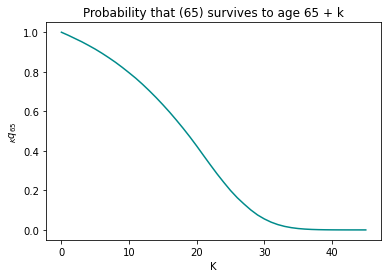

In [38]:
plt.plot(k,lx[65+k]/lx[65],color = "darkcyan")
plt.xlabel("K")            
plt.ylabel("$_{K}q_{65}$" )
plt.title("Probability that (65) survives to age 65 + k")
plt.show()

#### Caso 01:
calcular la probabilidad de que **(0)** alcance la **edad de 100**

In [39]:
lx[100]/lx[0]


0.00596

#### Caso 02:
calcular la probabilidad de que **(18)** alcance la **edad de 100**

In [40]:
lx[100]/lx[18]

0.00599808785789765

#### Caso 03:
Grafique las probabilidades de supervivencia para (18) hasta los 100 años

In [41]:
k = pd.Series(range(0,(100-18)+1,1))
k

0      0
1      1
2      2
3      3
4      4
      ..
78    78
79    79
80    80
81    81
82    82
Length: 83, dtype: int64

In [42]:
# Plot the survival probabilties for (18) up to age 100


In [43]:
lx[18+k]/lx[18]


18     1.000000
19     0.999577
20     0.998994
21     0.998319
22     0.997645
         ...   
96     0.033603
97     0.023016
98     0.015237
99     0.009742
100    0.005998
Name: lx, Length: 83, dtype: float64

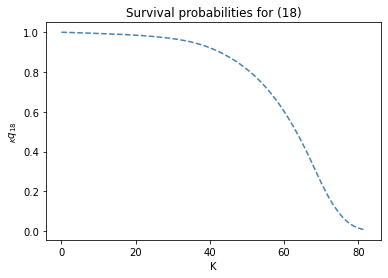

In [44]:
plt.plot(k,lx[18+k]/lx[18],color = "steelblue", linestyle = "--")
plt.xlabel("K")            
plt.ylabel("$_{K}q_{18}$" )
plt.title("Survival probabilities for (18)")
plt.savefig("Kq18.png")
plt.show()

#### Caso 04:
Grafique el número de muertes $d_{x}$ por edad

<AxesSubplot:title={'center':'Número de muertes (Belgica, hombres, 2013)'}, xlabel='age'>

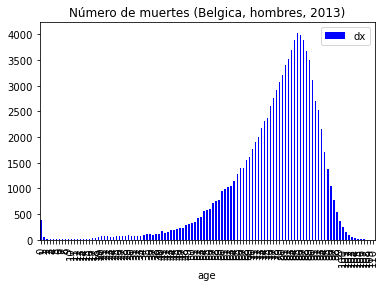

In [45]:
#metodo por dataframe

life_table.plot(x = "age", y = "dx" , 
                kind ="bar",color = "blue",
                title = "Número de muertes (Belgica, hombres, 2013)" )


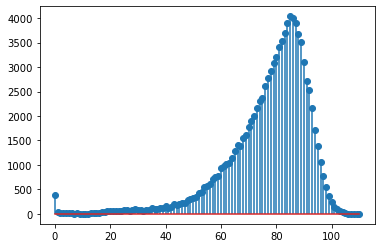

In [46]:
#metodo por stemplot

plt.stem(age, dx)
plt.show()

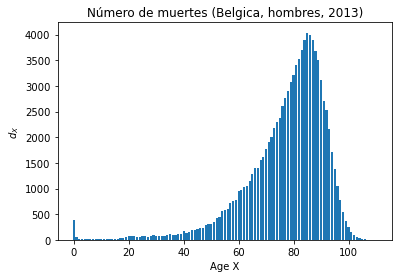

In [47]:
#metodo por barras

fig, ax1 = plt.subplots()
ax1.bar(age,dx)
plt.xlabel("Age X")            
plt.ylabel("$d_{X}$" )
plt.title("Número de muertes (Belgica, hombres, 2013)")
plt.show()

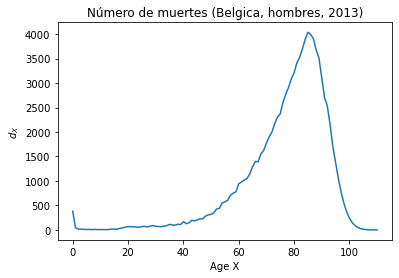

In [48]:
#metodo por lineas v2
fig, ax1 = plt.subplots()
ax1.plot(age,dx)
plt.xlabel("Age X")            
plt.ylabel("$d_{X}$" )
plt.title("Número de muertes (Belgica, hombres, 2013)")
plt.show()

#### Caso 05:
Simular el número de muertes(recien nacidos) usando una distribución binomial

In [49]:
 # Simulate the number of deaths using a binomial distribution
# para determinada edad
sim0 = binom.rvs(n = 1 , size = lx[0], p = qx[0])
print(sim0)

print(sum(sim0))

[0 0 0 ... 0 0 0]
347


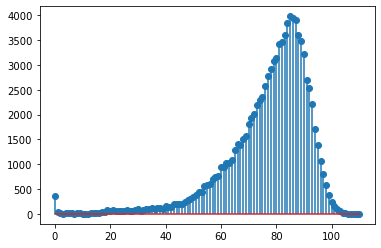

In [50]:
# de referencis
#vector2 =  pd.Series(range(len(lx)))
#vector1 = pd.Series(range(0,len(lx),1))

vec_sim = pd.Series([0]*len(lx))  # definimos una serie donde se colocará el resultado

for i in range(len(lx)): # or vector1 o 2 
    vec_sim[i] = sum(binom.rvs(n = 1 , size = lx[i], p = qx[i]))  #guardamos el resultado de cada edad en su fila respectiva
    
#grafico de esa simulacion
plt.stem(age, vec_sim)
plt.show()



### Probabilidades de supervivencia de un año a varios años
![g1](imagenes/fotm1.png)

### La regla de la multiplicación
Reescribiendo las probabilidades de supervivencia:
- $_{t + u}p_{x} = _{u}p_{x} +  _{t}p_{x+u}$   

Con $k$ como entero obtenemos:   

-  $_{k}p_{x} = p_{x}*_{k−1}p_{x+1}$
-  $_{k}p_{x} = p_{x}*p_{x+1}*_{k−1}p_{x+2}$   
-  $_{k}p_{x} = p_{x}*p_{x+1}*...*p_{x+k-1}$   

Este último es un producto de las probabilidades de supervivencia a un año.

Calcule  $_{5}P_{65} = p_{65}*p_{66}*p_{67}*p_{68}*p_{69}$

In [51]:
px[65:69+1]

65    0.98483
66    0.98328
67    0.98306
68    0.98080
69    0.97955
Name: qx, dtype: float64

In [52]:
np.prod(px[65:69+1])

0.9145881430551792

Calcule  $_{5}P_{65} = l_{70} /  l_{65}$
                                                                        
                                                                         

In [53]:
lx[70]/lx[65]


0.9145969498910675

In [54]:
lx[65:70+1]

65    84915
66    83627
67    82229
68    80836
69    79284
70    77663
Name: lx, dtype: int64

Calcule  $_{k}P_{65}$   para $K = 1, 2, 3, 4, 5$

In [55]:
np.cumprod(px[65:69+1])

65    0.984830
66    0.968364
67    0.951960
68    0.933682
69    0.914588
Name: qx, dtype: float64

In [56]:
np.cumprod(px[65:69+1].values)

array([0.98483   , 0.96836364, 0.95195956, 0.93368194, 0.91458814])

In [57]:
a = pd.Series(1)
a = a.append(np.cumprod(px[65:69+1]),ignore_index= True)
a
pd.concat( [pd.Series(1), np.cumprod(px[65:69+1]) ],ignore_index= True )

0    1.000000
1    0.984830
2    0.968364
3    0.951960
4    0.933682
5    0.914588
dtype: float64

### Una probabilidad de mortalidad diferida
![md](imagenes/md.png)

$(x)$ sobrevive $k$ años enteros, pero muere antes de llegar a la edad $x + k + 1$:   

$_{k}∣q_{x} = _{k}p_{x} * q_{x+k}$.

calcule $_{5}∣q_{65} = _{5}p_{65} * q_{70}$.

In [58]:
np.prod(px[65:69+1])*qx[70]    # opcion 01

0.020907484950241396

In [59]:
lx[70]/lx[65]*dx[70]/lx[70] 

0.020903256197373845

Calcule  $_{5}q_{65} = d_{70} /  l_{65}$

In [60]:
 # opcion 02
dx[70]/lx[65]  

0.020903256197373845

calcule $_{k}∣q_{65} = _{k}p_{65} * q_{65+k}$ para $K = 0, 1, 2, 3, 4 ...$

In [1]:
# definimos la probabilidad que sobreviva hasta k
len(px)
kpx = pd.concat( [pd.Series(1), np.cumprod(px[65:len(px)-1]) ] ,ignore_index= True )
kpx

NameError: name 'px' is not defined

In [62]:
# Definimos la mortalidad diferida
kqx = kpx*qx[65:len(px)].values
print(kqx)

sum(kqx)


0     0.015170
1     0.016466
2     0.016404
3     0.018278
4     0.019094
5     0.020907
6     0.022342
7     0.023552
8     0.025586
9     0.027124
10    0.027907
11    0.030687
12    0.032619
13    0.034271
14    0.036299
15    0.037782
16    0.040131
17    0.041476
18    0.043507
19    0.045821
20    0.047540
21    0.047031
22    0.045937
23    0.043235
24    0.041346
25    0.036614
26    0.031897
27    0.029848
28    0.025497
29    0.020086
30    0.016224
31    0.012384
32    0.009104
33    0.006437
34    0.004372
35    0.002851
36    0.001784
37    0.001071
38    0.000617
39    0.000341
40    0.000181
41    0.000093
42    0.000046
43    0.000022
44    0.000010
45    0.000008
dtype: float64


1.0000000000000004

### Ejercicios

1. Calcule la probabilidad de que un joven de **18 años** cumpla **23** usando **prod()**.  $_{5}p_{18}$ 
2. Calcule las probabilidades de supervivencia de **(18)** hasta **los 100 años**. $_{k}p_{18}$ 
3. Grafique la probabilidad de que **(18)** alcance la edad de **19, 20, 21, ..., 100**
4. Grafique la mortalidad diferida  $_{k}∣q_{18}$ para $k$ , de tal forma que llegue al final de la tabla.


### Calcular la esperanza de vida

$K_{x} = ⌊T_{x} ⌋$, el número de años completos vividos por (x) en el futuro.    
$Pr(K_{x} = k) = Pr(k ≤ T_{x} < k + 1)$   
$Pr(K_{x} = k) = _{k}p_{x} * q_{x+k}$   
$Pr(K_{x} = k) =_{k}p_{x} − _{k+1}p_{x}$  


Calcule   $Pr(K = 5) = _{5}p_{65}*q_{70}= _{5}p_{65} − _{6}p_{65}$

In [63]:
np.prod(px[65:69+1])*qx[70] 

0.020907484950241396

In [64]:
np.prod(px[65:69+1])-np.prod(px[65:70+1])

0.020907484950241417

El valor esperado de $K_{x}$ se denomina reducción esperanza de vida de $x$.
![](imagenes/epr.png)
### caso 05 :   

Mr. X tiene 35 años y vive en Bélgica.   
Como trabajador independiente, debe ocuparse de su planificación financiera.   
¿Cuál es una buena estimación de su breve vida futura?


In [65]:
#Compute E[K35] = Sumatoria (kP35)para k  = 0, 1,2, .....

# probabilidad de sobrevivir por año
print(px[35:len(px)])


35     0.99884
36     0.99896
37     0.99902
38     0.99879
39     0.99886
        ...   
106    0.47924
107    0.46409
108    0.45016
109    0.43743
110    0.00000
Name: qx, Length: 76, dtype: float64


In [66]:
# probabilidades de que (35) sobreviva k años
kp35 = np.cumprod(px[35:len(px)-1])
kp35

35     0.998840
36     0.997801
37     0.996823
38     0.995617
39     0.994482
         ...   
105    0.000154
106    0.000074
107    0.000034
108    0.000015
109    0.000007
Name: qx, Length: 75, dtype: float64

In [67]:
# curtate expected future lifetime of (35)
sum(kp35)

43.536259604340856

¿Cómo pasar de $E[K_{x}]$ a $E[T_{x}]$?
Así: ¿de la recortada a la esperanza de vida completa?   
Use:   

$E[T_{x}] ≈ E[K_{x}] + 1/2$




In [68]:
sum(kp35)

43.536259604340856

In [69]:
ex[35]

44.04

In [70]:
ex[35]-sum(kp35)

0.5037403956591433

### Tablas de mortalidad dínamicas

El enfoque de período 
![](imagenes/periodo.png)
El enfoque de cohorte
![](imagenes/diagonal.png)

In [71]:
life_table_m = pd.read_csv("mltper_1x1.txt",header = 1, delimiter= '\s+') 
life_table_m


,Year,Age,mx,qx,ax,lx,dx,Lx,Tx,ex
0,1841,0,0.18652,0.16496,0.30,100000,16496,88439,4031618,40.32
1,1841,1,0.07413,0.07148,0.50,83504,5969,80520,3943179,47.22
2,1841,2,0.03983,0.03905,0.50,77536,3028,76022,3862659,49.82
3,1841,3,0.02333,0.02306,0.50,74508,1718,73648,3786638,50.82
4,1841,4,0.01707,0.01693,0.50,72789,1232,72173,3712989,51.01
...,...,...,...,...,...,...,...,...,...,...
19753,2018,106,0.67756,0.50610,0.50,30,15,22,42,1.43
19754,2018,107,0.70705,0.52238,0.50,15,8,11,20,1.37
19755,2018,108,0.73490,0.53742,0.50,7,4,5,9,1.33
19756,2018,109,0.76099,0.55125,0.50,3,2,2,4,1.30


### Caso 07
Las probabilidades de supervivencia del período de un famoso belga   
Jacques Brel es un cantante belga que nació en 1929 y murió a los 49 años.   
¿Cuál es la probabilidad $_{49}∣q_{0,1929}$  de que un recién nacido nacido en 1929 muera a los 49 años?

In [72]:
# python 3.x
life_table_m = pd.read_excel("life_table_m.xlsx",engine='openpyxl') 
life_table_m

,Year,Age,qx,lx,dx,ex
0,1841,0,0.16496,100000,16496,40.32
1,1841,1,0.07148,83504,5969,47.22
2,1841,2,0.03905,77536,3028,49.82
3,1841,3,0.02306,74508,1718,50.82
4,1841,4,0.01693,72789,1232,51.01
...,...,...,...,...,...,...
19026,2018,106,0.50610,30,15,1.43
19027,2018,107,0.52238,15,8,1.37
19028,2018,108,0.53742,7,4,1.33
19029,2018,109,0.55125,3,2,1.30


In [73]:
# Periodo o forma vertical 
life_table_m.columns

Index(['Year', 'Age', 'qx', 'lx', 'dx', 'ex'], dtype='object')

In [74]:
life_table_m.dtypes

Year      int64
Age       int64
qx      float64
lx        int64
dx        int64
ex      float64
dtype: object

In [75]:
life_table_m.ex

0        40.32
1        47.22
2        49.82
3        50.82
4        51.01
         ...  
19026     1.43
19027     1.37
19028     1.33
19029     1.30
19030     1.27
Name: ex, Length: 19031, dtype: float64

In [76]:
life_table_m.Age

0          0
1          1
2          2
3          3
4          4
        ... 
19026    106
19027    107
19028    108
19029    109
19030    110
Name: Age, Length: 19031, dtype: int64

In [77]:
period_life_table = life_table_m[life_table_m.Year == 1929]

In [78]:
period_life_table

,Year,Age,qx,lx,dx,ex
9130,1929,0,0.12134,100000,12134,53.18
9131,1929,1,0.02221,87866,1951,59.48
9132,1929,2,0.00775,85914,666,59.82
9133,1929,3,0.00511,85248,435,59.28
9134,1929,4,0.00426,84813,362,58.58
...,...,...,...,...,...,...
9235,1929,105,0.58204,0,0,1.20
9236,1929,106,0.59086,0,0,1.18
9237,1929,107,0.59886,0,0,1.16
9238,1929,108,0.60610,0,0,1.14


In [79]:
period_life_table = period_life_table.set_index('Age')
period_life_table


,Year,qx,lx,dx,ex
Age,,,,,
0,1929,0.12134,100000,12134,53.18
1,1929,0.02221,87866,1951,59.48
2,1929,0.00775,85914,666,59.82
3,1929,0.00511,85248,435,59.28
4,1929,0.00426,84813,362,58.58
...,...,...,...,...,...
105,1929,0.58204,0,0,1.20
106,1929,0.59086,0,0,1.18
107,1929,0.59886,0,0,1.16


In [80]:
qx = period_life_table.qx
qx

Age
0      0.12134
1      0.02221
2      0.00775
3      0.00511
4      0.00426
        ...   
105    0.58204
106    0.59086
107    0.59886
108    0.60610
109    0.61264
Name: qx, Length: 110, dtype: float64

In [81]:
px = 1- qx
px

Age
0      0.87866
1      0.97779
2      0.99225
3      0.99489
4      0.99574
        ...   
105    0.41796
106    0.40914
107    0.40114
108    0.39390
109    0.38736
Name: qx, Length: 110, dtype: float64

In [82]:
px[0:49]

Age
0     0.87866
1     0.97779
2     0.99225
3     0.99489
4     0.99574
5     0.99624
6     0.99744
7     0.99753
8     0.99806
9     0.99840
10    0.99804
11    0.99879
12    0.99844
13    0.99813
14    0.99794
15    0.99707
16    0.99696
17    0.99690
18    0.99634
19    0.99557
20    0.99493
21    0.99539
22    0.99588
23    0.99570
24    0.99524
25    0.99512
26    0.99555
27    0.99562
28    0.99526
29    0.99514
30    0.99471
31    0.99512
32    0.99475
33    0.99534
34    0.99425
35    0.99451
36    0.99430
37    0.99315
38    0.99317
39    0.99287
40    0.99285
41    0.99330
42    0.99206
43    0.99119
44    0.99073
45    0.99121
46    0.99029
47    0.98922
48    0.98912
Name: qx, dtype: float64

In [83]:
np.prod(px[0:49])*qx[49]

0.008460916350830402

Método Dinámico

In [84]:
period_life_table = life_table_m[life_table_m.Year -life_table_m.Age == 1929 ]
period_life_table

,Year,Age,qx,lx,dx,ex
9130,1929,0,0.12134,100000,12134,53.18
9241,1930,1,0.01828,88695,1622,61.05
9352,1931,2,0.00573,88713,509,61.57
9463,1932,3,0.00403,87900,354,61.43
9574,1933,4,0.00380,87803,333,60.59
...,...,...,...,...,...,...
18565,2014,85,0.10163,38621,3925,5.69
18676,2015,86,0.11839,34308,4062,5.16
18787,2016,87,0.12633,31373,3963,4.92
18898,2017,88,0.14232,28076,3996,4.48


In [85]:
period_life_table = period_life_table.set_index('Age')
period_life_table


,Year,qx,lx,dx,ex
Age,,,,,
0,1929,0.12134,100000,12134,53.18
1,1930,0.01828,88695,1622,61.05
2,1931,0.00573,88713,509,61.57
3,1932,0.00403,87900,354,61.43
4,1933,0.00380,87803,333,60.59
...,...,...,...,...,...
85,2014,0.10163,38621,3925,5.69
86,2015,0.11839,34308,4062,5.16
87,2016,0.12633,31373,3963,4.92


In [86]:
qx = period_life_table.qx
px = 1- qx

px[0:49]

np.prod(px[0:49])*qx[49]

0.004759279149657724

In [87]:
#creamos una funcion para calcular distintos casos

def calculo(año,edad):
    period_life_table = life_table_m[life_table_m.Year -life_table_m.Age == año ]
    period_life_table
    period_life_table = period_life_table.set_index('Age')
    period_life_table
    
    qx = period_life_table.qx
    qx
    px = 1- qx
    px

    px[0:edad]
    return np.prod(px[0:edad])*qx[edad]




Data =[]
for x in range(0,56):
        y = calculo(1930,x)
        Data.append(y)


#### <span style='color:midnightblue'>  Edwin Fernandez - BLID
<span style='color:midnightblue'> Python para Actuarios Vida  </span>
***